In [1]:
import pandas as pd
train=pd.read_csv('housing_train.csv')
test=pd.read_csv('housing_test.csv')
# create a single dataframe of both the training and testing data
wholedf = pd.concat([train,test])

In [3]:
#Setting option to show max rows and max columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows", None)

In [4]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm
import datetime

%matplotlib inline

import seaborn as sns

import sklearn
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import RFE

In [5]:
wholedf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [6]:
wholedf.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,127,120,RL,NaN,4928,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,5,1976,1976,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,120,Unf,0,958,1078,GasA,TA,Y,SBrkr,958,0,0,958,0,0,2,0,2,1,TA,5,Typ,1,TA,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,205,0,0,0,0,NaN,NaN,NaN,0,2,2007,WD,Normal,128000.0
1,889,20,RL,95.0,15865,Pave,NaN,IR1,Lvl,AllPub,Inside,Mod,NAmes,Norm,Norm,1Fam,1Story,8,6,1970,1970,Flat,Tar&Grv,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,PConc,TA,Gd,Gd,ALQ,351,Rec,823,1043,2217,GasA,Ex,Y,SBrkr,2217,0,0,2217,1,0,2,0,4,1,Gd,8,Typ,1,TA,Attchd,1970.0,Unf,2,621,TA,TA,Y,81,207,0,0,224,0,NaN,NaN,NaN,0,10,2007,WD,Normal,268000.0
2,793,60,RL,92.0,9920,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,7,5,1996,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,862,Unf,0,255,1117,GasA,Ex,Y,SBrkr,1127,886,0,2013,1,0,2,1,3,1,TA,8,Typ,1,TA,Attchd,1997.0,Unf,2,455,TA,TA,Y,180,130,0,0,0,0,NaN,NaN,NaN,0,6,2007,WD,Normal,269790.0
3,110,20,RL,105.0,11751,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1977,1977,Hip,CompShg,Plywood,Plywood,BrkFace,480.0,TA,TA,CBlock,Gd,TA,No,BLQ,705,Unf,0,1139,1844,GasA,Ex,Y,SBrkr,1844,0,0,1844,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1977.0,RFn,2,546,TA,TA,Y,0,122,0,0,0,0,NaN,MnPrv,NaN,0,1,2010,COD,Normal,190000.0
4,422,20,RL,NaN,16635,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,7,1977,2000,Gable,CompShg,CemntBd,CmentBd,Stone,126.0,Gd,TA,CBlock,Gd,TA,No,ALQ,1246,Unf,0,356,1602,GasA,Gd,Y,SBrkr,1602,0,0,1602,0,1,2,0,3,1,Gd,8,Typ,1,TA,Attchd,1977.0,Fin,2,529,TA,TA,Y,240,0,0,0,0,0,NaN,NaN,NaN,0,6,2009,WD,Normal,215000.0


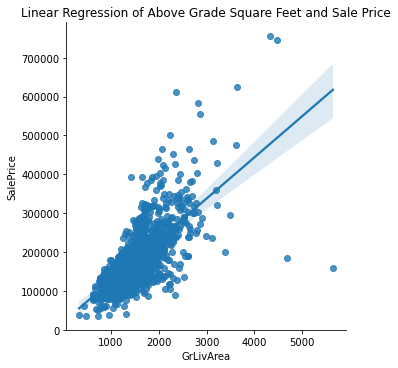

In [7]:
sns.lmplot(x="GrLivArea", y="SalePrice", data=wholedf);
plt.title("Linear Regression of Above Grade Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

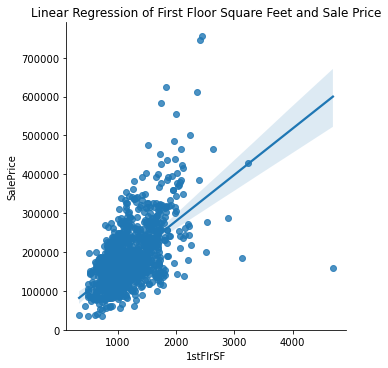

In [8]:
sns.lmplot(x="1stFlrSF", y="SalePrice", data=wholedf);
plt.title("Linear Regression of First Floor Square Feet and Sale Price")
plt.ylim(0,)
plt.show()

In [9]:
traincorr = train.corr()['SalePrice']
# convert series to dataframe so it can be sorted
traincorr = pd.DataFrame(traincorr)
# correct column label from SalePrice to correlation
traincorr.columns = ["Correlation"]
# sort correlation
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

,Correlation
SalePrice,1.000000
OverallQual,0.789185
GrLivArea,0.707300
GarageCars,0.628329
GarageArea,0.619000
TotalBsmtSF,0.595042
1stFlrSF,0.587642
FullBath,0.554988
TotRmsAbvGrd,0.528363
YearBuilt,0.514408


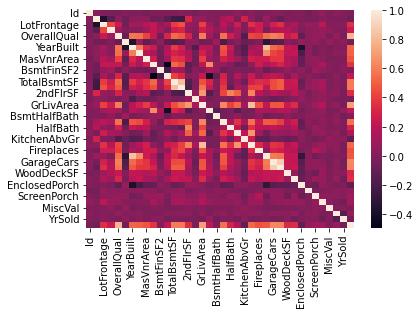

In [10]:
corr = wholedf.corr()
sns.heatmap(corr)
plt.show()

In [11]:
#wholedf[["Utilities", "Id"]].groupby(['Utilities'], as_index=False).count()
wholedf['Utilities'] = wholedf['Utilities'].fillna("AllPub")

# wholedf[["Electrical", "Id"]].groupby(['Electrical'], as_index=False).count()
wholedf['Electrical'] = wholedf['Electrical'].fillna("SBrkr")

# wholedf[["Exterior1st", "Id"]].groupby(['Exterior1st'], as_index=False).count()
wholedf['Exterior1st'] = wholedf['Exterior1st'].fillna("VinylSd")

#wholedf[["Exterior2nd", "Id"]].groupby(['Exterior2nd'], as_index=False).count()
wholedf['Exterior2nd'] = wholedf['Exterior2nd'].fillna("VinylSd")

In [12]:
# Missing interger values replace with the median in order to return an integer
wholedf['BsmtFullBath']= wholedf.BsmtFullBath.fillna(wholedf.BsmtFullBath.median())
wholedf['BsmtHalfBath']= wholedf.BsmtHalfBath.fillna(wholedf.BsmtHalfBath.median())
wholedf['GarageCars']= wholedf.GarageCars.fillna(wholedf.GarageCars.median())

# Missing float values were replaced with the mean for accuracy 
wholedf['BsmtUnfSF']= wholedf.BsmtUnfSF.fillna(wholedf.BsmtUnfSF.mean())
wholedf['BsmtFinSF2']= wholedf.BsmtFinSF2.fillna(wholedf.BsmtFinSF2.mean())
wholedf['BsmtFinSF1']= wholedf.BsmtFinSF1.fillna(wholedf.BsmtFinSF1.mean())
wholedf['GarageArea']= wholedf.GarageArea.fillna(wholedf.GarageArea.mean())
wholedf['MasVnrArea']= wholedf.MasVnrArea.fillna(wholedf.MasVnrArea.mean())

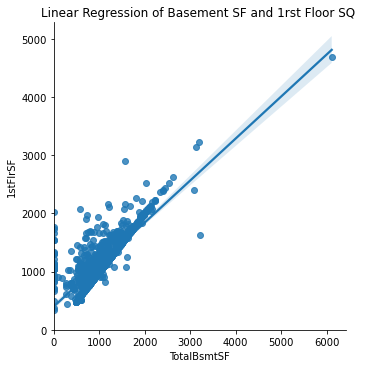

In [13]:
wholedf.GarageYrBlt.fillna(wholedf.YearBuilt, inplace=True)
wholedf.TotalBsmtSF.fillna(wholedf['1stFlrSF'], inplace=True)

sns.lmplot(x="TotalBsmtSF", y="1stFlrSF", data=wholedf)
plt.title("Linear Regression of Basement SF and 1rst Floor SQ ")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

In [14]:
lot = wholedf[['LotArea','LotConfig','LotFrontage','LotShape']]
lot = pd.get_dummies(lot)
lot.corr()['LotFrontage']

LotArea              0.426095
LotFrontage          1.000000
LotConfig_Corner     0.258380
LotConfig_CulDSac   -0.082407
LotConfig_FR2       -0.045250
LotConfig_FR3        0.001667
LotConfig_Inside    -0.173192
LotShape_IR1         0.149116
LotShape_IR2         0.039526
LotShape_IR3         0.215682
LotShape_Reg        -0.193426
Name: LotFrontage, dtype: float64

In [15]:
lot["LotAreaUnSq"] = np.sqrt(lot['LotArea'])

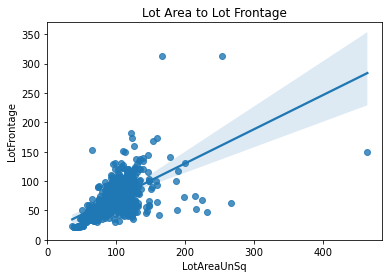

In [16]:
sns.regplot(x="LotAreaUnSq", y="LotFrontage", data=lot);
plt.xlim(0,)
plt.ylim(0,)
plt.title("Lot Area to Lot Frontage")
plt.show()

In [17]:
# Remove all lotfrontage is missing values
lot = lot[lot['LotFrontage'].notnull()]
# See the not null values of LotFrontage
lot.describe()['LotFrontage']

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
wholedf['LotFrontage']= wholedf.LotFrontage.fillna(np.sqrt(wholedf.LotArea))
wholedf['LotFrontage']= wholedf['LotFrontage'].astype(int)

ValueError: cannot reindex from a duplicate axis

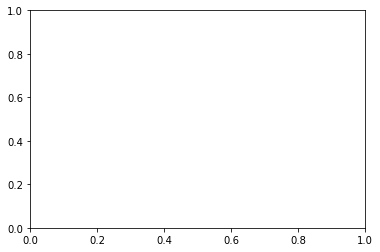

In [19]:
# Distribution of values after replacement of missing frontage
sns.kdeplot(wholedf['LotFrontage']);
sns.kdeplot(lot['LotFrontage']);
sns.kdeplot(lot['LotAreaUnSq']);
plt.title("Distribution of Lot Frontage")
plt.show()

In [ ]:
countmissing = wholedf.isnull().sum().sort_values(ascending=False)
percentmissing = (wholedf.isnull().sum()/wholedf.isnull().count()).sort_values(ascending=False)
wholena = pd.concat([countmissing,percentmissing], axis=1)
wholena.head(3)

In [20]:
Livingtotalsq = wholedf['TotalBsmtSF'] + wholedf['1stFlrSF'] + wholedf['2ndFlrSF'] + wholedf['GarageArea'] + wholedf['WoodDeckSF'] + wholedf['OpenPorchSF']
wholedf['LivingTotalSF'] = Livingtotalsq

# Total Living Area divided by LotArea
wholedf['PercentSQtoLot'] = wholedf['LivingTotalSF'] / wholedf['LotArea']

# Total count of all bathrooms including full and half through the entire building
wholedf['TotalBaths'] = wholedf['BsmtFullBath'] + wholedf['BsmtHalfBath'] + wholedf['HalfBath'] + wholedf['FullBath']

# Percentage of total rooms are bedrooms
wholedf['PercentBedrmtoRooms'] = wholedf['BedroomAbvGr'] / wholedf['TotRmsAbvGrd']

# Number of years since last remodel, if there never was one it would be since it was built
wholedf['YearSinceRemodel'] = 2016 - ((wholedf['YearRemodAdd'] - wholedf['YearBuilt']) + wholedf['YearBuilt'])

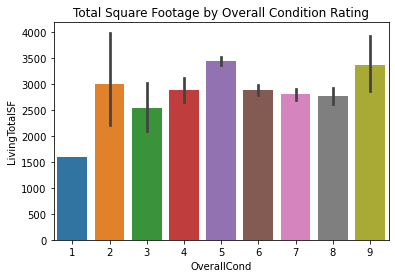

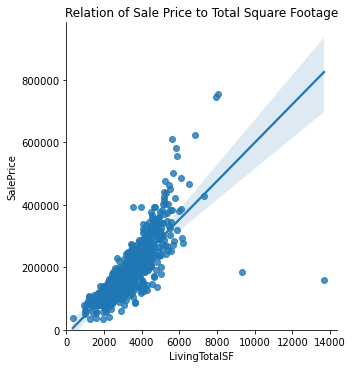

In [21]:
sns.barplot(x="OverallCond", y="LivingTotalSF", data=wholedf)
plt.title("Total Square Footage by Overall Condition Rating")
plt.show()

sns.lmplot(x="LivingTotalSF", y="SalePrice", data=wholedf)
plt.title("Relation of Sale Price to Total Square Footage")
plt.xlim(0,)
plt.ylim(0,)
plt.show()

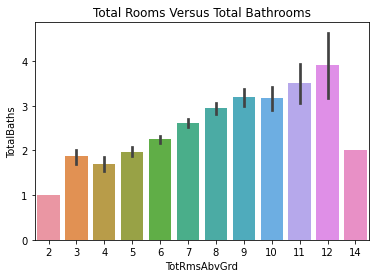

In [22]:
ax = sns.barplot(x="TotRmsAbvGrd", y="TotalBaths",data=wholedf)
plt.title("Total Rooms Versus Total Bathrooms")
plt.show()

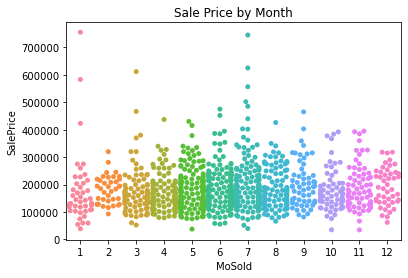

ValueError: cannot reindex from a duplicate axis

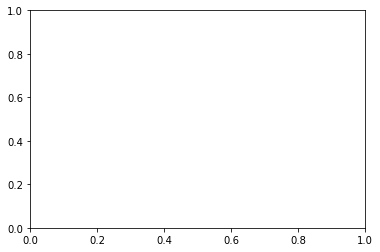

In [23]:
sns.swarmplot(x="MoSold", y="SalePrice", data=wholedf)
plt.title("Sale Price by Month")
plt.show()

sns.kdeplot(wholedf['MoSold']);
plt.title("Distribution of Month Sold")
plt.xlim(1,12)
plt.show()

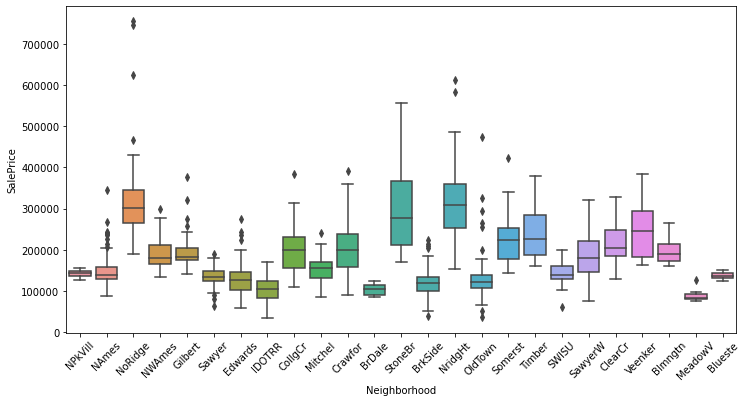

In [24]:
plt.figure(figsize = (12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice',  data = wholedf)
plt.xticks(rotation=45)
plt.show()


In [25]:
pricing1 = wholedf[['Id','SalePrice','MiscVal']]

neigh = wholedf[['Neighborhood','MSZoning','MSSubClass','BldgType','HouseStyle']]

dates = wholedf[['YearBuilt','YearRemodAdd','GarageYrBlt','YearSinceRemodel']]

quacon = wholedf[['ExterQual','BsmtQual','PoolQC','Condition1','Condition2','SaleCondition',
                  'BsmtCond','ExterCond','GarageCond','KitchenQual','GarageQual','HeatingQC','OverallQual','OverallCond']]

features =  wholedf[['Foundation','RoofStyle','RoofMatl','Exterior1st','Exterior2nd',
                     'MiscFeature','PavedDrive','Utilities',
                     'Heating','CentralAir','Electrical','Fence']]

sqfoot = wholedf[['LivingTotalSF','TotalBsmtSF','1stFlrSF','2ndFlrSF','GrLivArea',
                  'GarageArea','WoodDeckSF','OpenPorchSF','LotArea','PercentSQtoLot','LowQualFinSF']]

roomfeatcount = wholedf[['PercentBedrmtoRooms','TotalBaths','FullBath','HalfBath',
                         'KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageCars','GarageType','EnclosedPorch']]

# Splits out sale price for the training set and only has not null values
pricing = wholedf['SalePrice']
pricing = pricing[pricing.notnull()]

# Bringing it all together
wholedf = pd.concat([pricing1,neigh,dates,quacon,features,sqfoot,roomfeatcount], axis=1)

In [26]:
wholedf = pd.get_dummies(wholedf)

In [27]:
traincorr = wholedf.corr()['SalePrice']
# convert series to dataframe so it can be sorted
traincorr = pd.DataFrame(traincorr)
# correct column label from SalePrice to correlation
traincorr.columns = ["Correlation"]
# sort correlation
traincorr2 = traincorr.sort_values(by=['Correlation'], ascending=False)
traincorr2.head(15)

,Correlation
SalePrice,1.000000
LivingTotalSF,0.804585
OverallQual,0.789185
GrLivArea,0.707300
GarageCars,0.628329
GarageArea,0.619000
TotalBaths,0.610271
TotalBsmtSF,0.595042
1stFlrSF,0.587642
BsmtQual_Ex,0.561192


In [28]:
train_X = wholedf[wholedf['SalePrice'].notnull()]
del train_X['SalePrice']
test_X =  wholedf[wholedf['SalePrice'].isnull()]
del test_X['SalePrice']

In [29]:
# Create all datasets that are necessary to train, validate and test models
train_valid_X = train_X
train_valid_y = pricing
test_X = test_X
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

In [30]:
model = Ridge()

In [31]:
model.fit( train_X , train_y )

# Print the Training Set Accuracy and the Test Set Accuracy in order to understand overfitting
print (model.score( train_X , train_y ) , model.score( valid_X , valid_y ))

0.8973140262172661 0.8756070263361246


In [32]:
id = test_X.Id
result = model.predict(test_X)

# output = pd.DataFrame( { 'id': id , 'SalePrice': result}, columns=['id', 'SalePrice'] )
output = pd.DataFrame( { 'id': id , 'SalePrice': result} )
output = output[['id', 'SalePrice']]

output.to_csv("solution.csv", index = False)
output.head(10)

,id,SalePrice
0,337,337327.514983
1,1018,211955.115128
2,929,251046.373455
3,1148,192574.774279
4,1227,203646.385275
5,650,83429.072493
6,1453,111917.061627
7,152,311904.915675
8,427,216106.054915
9,776,160428.402316
